# Write a python program for Multiple Linear Regression and Check weather multicollinearity exits between the data or not.

### reading and converting in array

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
def read_csv(filename):
    x1 = []
    x2 = []
    x3 = []
    y = []
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
           # x.append((row))
            x1.append(int(row[0]))
            x2.append(int(row[1]))
            x3.append(int(row[2]))
            y.append(int(row[3]))
        return x1,x2,x3,y
if __name__ == '__main__':
    x1,x2,x3,y = read_csv(r"C:\Users\ddel\R.csv")

In [3]:
x = np.vstack((x1,x2,x3)) 
print(x)

[[ 93  89  96  73  53  69  47  87  79  69  70  93  79  70  93  78  81  88
   78  82  86  78  76  96]
 [ 88  91  98  66  46  74  56  79  70  70  65  95  80  73  89  75  90  92
   83  86  82  83  83  93]
 [ 93  90 100  70  55  77  60  90  88  73  74  91  73  78  96  68  93  86
   77  90  89  85  71  95]]


In [4]:
cov_mat1 = np.array(np.stack((x1,x2,x3), axis = 1))
cov_mat1

array([[ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]])

In [5]:
xT = x.transpose()
print(xT)

[[ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]


### β estimated

In [52]:
xTx = np.matmul(xT, x)
xTx_inverse = np.linalg.inv(xTx)
product_xTxy = np.matmul(xTx_inverse,xT)
print(product_xTxy)

[[ 3.3203125   3.515625    3.27929688  6.70703125]
 [ 1.3125      1.5         1.1875      3.25      ]
 [-2.125      -2.1875     -2.         -5.        ]
 [-3.125      -3.375      -3.125      -6.75      ]
 [ 0.03125    -0.03125     0.015625    0.        ]
 [ 0.25        0.375       0.375       0.5       ]
 [-0.34375    -0.3125     -0.375      -0.4375    ]
 [ 0.25        0.3125      0.3125      0.5       ]
 [ 0.015625    0.          0.015625    0.25      ]
 [-0.1875     -0.125      -0.1875     -0.25      ]
 [-0.03125     0.09375     0.         -0.0625    ]
 [-0.03417969 -0.06054688 -0.04101562 -0.08789062]
 [-0.0546875  -0.078125   -0.0625     -0.125     ]
 [-0.09375    -0.21875    -0.09375    -0.1875    ]
 [ 0.015625    0.0625      0.          0.        ]
 [ 0.         -0.015625   -0.015625    0.03125   ]
 [ 0.015625    0.0078125   0.0078125   0.03125   ]
 [ 0.015625    0.0078125   0.          0.        ]
 [-0.0390625  -0.03125    -0.0390625  -0.046875  ]
 [ 0.0234375   0.03125     0.02

### coffient correlation

In [7]:
def calculatemean(numbers):
    s= sum(numbers)
    l = len(numbers)
    return s/l
def find_corr_x_y(x,y):
    n = len(x)
    # product sum
    prod = []
    for xi,yi in zip(x,y):
        prod.append(xi*yi)
    
    sum_prod_x_y = sum(prod)
    sum_x = sum(x)
    sum_y = sum(y)
    squared_sum_x = sum_x**2
    squared_sum_y = sum_y**2
    x_square = []
    
    for xi in x:
        x_square.append(xi**2)
    # Find the sum
    x_square_sum = sum(x_square)
    y_square=[]
    
    for yi in y:
        y_square.append(yi**2)
   
    # sum
    y_square_sum = sum(y_square)
    
    # calculating correlation
    numerator = n*sum_prod_x_y - sum_x*sum_y
    denominator_term1 = n*x_square_sum - squared_sum_x
    denominator_term2 = n*y_square_sum - squared_sum_y
    denominator = (denominator_term1*denominator_term2)**0.5
    correlation = numerator/denominator

    return correlation
corr_mean = calculatemean((find_corr_x_y(x1,y),find_corr_x_y(x2,y),find_corr_x_y(x3,y)))
print("The mean correlation = ",corr_mean)

The mean correlation =  0.9506439499838478


### cofficient of determination calculation R(squared)

In [8]:
corr_determination = (corr_mean**2)*100
print("cofficient of determnetion = ",corr_determination,"%")

cofficient of determnetion =  90.37239196408926 %


### multicolinearity_checking (vif)

In [9]:
def mul_vif(x):
    vif = 1/(1-(x)**2)
    return vif

In [10]:
print(mul_vif(corr_determination),"\n multicolinearity not present")

-0.00012245643849881057 
 multicolinearity not present


### mean vector calculation

In [34]:
mu_vec = []
def meanVector(mat): 
    for i in range(24): 
        mean = 0.00 
        sum = 0 
        for j in range(4): 
            sum = sum + mat[j][i]
        mean = int(sum /24) 
        mu_vec.append(int(sum /24))
    return mea_vec

In [35]:
meanVector(x)
mu_vec1 = np.array(mu_vec)
mu_vec1

array([19, 18, 20, 14, 10, 15, 11, 17, 16, 14, 14, 19, 16, 15, 19, 15, 18,
       18, 16, 18, 18, 17, 15, 19])

### Pie chat for analysis of data

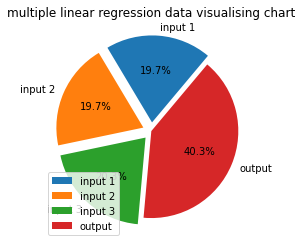

In [8]:
slices = [sum(x1), sum(x2), sum(x3), sum(y)]
tasks = ['input 1', 'input 2', 'input 3', 'output']
 
plt.pie(slices, labels=tasks, startangle=50,
        autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0))
 
plt.title('multiple linear regression data visualising chart')
plt.legend()
plt.show()

In [16]:
Xnorm = x.copy()
minx = np.min(x[:,1:])
maxx = np.max(x[:,1:])
Xnorm[:,1:] = (x[:,1:]-minx)/(maxx-minx)
Xnorm[:10,:]

array([[93,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [88,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [93,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [17]:
theta0 = np.zeros((x.shape[1],1))+0.5
Y_pred = Xnorm.dot(theta0)
Y_pred

array([[46.5],
       [44. ],
       [47. ]])

### annova table

In [18]:
DF_REG = 1
DF_RES = len(x) - 2 
DF_TOT = len(x) - 1
############################################Sum of square
m_y = np.mean(y)
n = len(y)
Y = np.array(y)
error = Y - Y_pred
################################################## SS Residual 
SS_res = np.sum(error**2)
################################################### SS Regression
SS_Reg = np.sum((Y_pred - m_y)**2)
# ####################################################SS Total
SS_total = np.sum((Y - m_y)**2)
############################################### MS Residual
MS_Res = SS_res/DF_RES
############################################## S Regression
MS_Reg = SS_Reg/DF_REG
############################################ F Statistics
F = MS_Reg/MS_Res

In [19]:
def anova_table():
    print('{0}\t\t{1}\t\t{2}\t\t\t{3}\t\t\t{4}'.format( "Sources","DF  " , "SS" , "MS" , "F statistics"))
    print('{0}\t{1}\t{2}\t{3}\t\t{4}'.format( "Regression" ,DF_REG , SS_Reg , MS_Reg , F))
    print('{0}\t{1}\t{2}\t{3}'.format("Residual",DF_RES , SS_res , MS_Res))
    print('{0}\t\t{1}\t{2}'.format("Total",  DF_TOT , SS_total ))

In [20]:
anova_table()

Sources		DF  		SS			MS			F statistics
Regression	1	40809.33854166667	40809.33854166667		0.039980385234220345
Residual	1	1020734.0	1020734.0
Total		2	13769.958333333332
